In [1]:
%pip install pandas
%pip install pandasql
%pip install matplotlib
%pip install seaborn
%pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.float_format = '{:.2f}'.format


In [3]:
# Carregar os dados
df = pd.read_csv('movies_dataset.csv')

In [4]:
df = df.sample(10000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 439372 to 966798
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MovieID               10000 non-null  int64  
 1   Title                 10000 non-null  object 
 2   Genre                 10000 non-null  object 
 3   ReleaseYear           10000 non-null  int64  
 4   ReleaseDate           10000 non-null  object 
 5   Country               10000 non-null  object 
 6   BudgetUSD             10000 non-null  float64
 7   US_BoxOfficeUSD       10000 non-null  float64
 8   Global_BoxOfficeUSD   10000 non-null  float64
 9   Opening_Day_SalesUSD  10000 non-null  float64
 10  One_Week_SalesUSD     10000 non-null  float64
 11  IMDbRating            10000 non-null  float64
 12  RottenTomatoesScore   10000 non-null  int64  
 13  NumVotesIMDb          10000 non-null  int64  
 14  NumVotesRT            10000 non-null  int64  
 15  Director          

In [6]:
df.head()

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
439372,439373,Thousand of happy,Comedy,2025,20-04-2025,Germany,526644.79,354601.93,735903.55,59330.23,180830.90,7.10,50,1584,2125,Jordan Orozco,John Jones
194483,194484,Early picture,Action,2006,22-04-2006,USA,2347021.73,6760294.72,11701216.54,1984604.72,3973216.25,4.60,37,31318,162,Benjamin Ray,Sharon Brady
282218,282219,Month world,Sci-Fi,1998,22-08-1998,USA,72406946.00,132616087.50,268082041.30,21488037.06,74747724.43,7.50,85,1743,257,William Carpenter,Meghan Johnson
423499,423500,Between that,Horror,2002,24-06-2002,USA,535836.15,1026695.44,1824165.71,134409.41,416683.50,6.40,69,6916,177,David Morris,Rachel Howard
584995,584996,Travel off exist carry,Sci-Fi,2023,07-10-2023,USA,6908533.40,11781458.38,23754352.56,2335916.84,6569366.37,6.00,75,2459,88,Emily Miller,Jacqueline Cooper


In [7]:
df.isnull().sum()

MovieID                 0
Title                   0
Genre                   0
ReleaseYear             0
ReleaseDate             0
Country                 0
BudgetUSD               0
US_BoxOfficeUSD         0
Global_BoxOfficeUSD     0
Opening_Day_SalesUSD    0
One_Week_SalesUSD       0
IMDbRating              0
RottenTomatoesScore     0
NumVotesIMDb            0
NumVotesRT              0
Director                0
LeadActor               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Genre'].value_counts()

Genre
Drama          2487
Comedy         1986
Action         1533
Horror         1082
Romance        1010
Thriller        945
Documentary     486
Sci-Fi          471
Name: count, dtype: int64

In [10]:
df['Country'].value_counts()

Country
USA            7091
UK              520
India           498
Canada          412
China           343
Australia       330
France          304
Germany         206
Japan           199
South Korea      97
Name: count, dtype: int64

In [11]:
round(df['ReleaseYear'].describe(), 2)

count   10000.00
mean     1998.12
std        19.21
min      1950.00
25%      1984.00
50%      2001.00
75%      2014.00
max      2025.00
Name: ReleaseYear, dtype: float64

In [12]:
df['BudgetUSD'].describe()

count       10000.00
mean      9685180.39
std      21044088.70
min        100000.00
25%       1189456.50
50%       3361732.78
75%       9008397.25
max     300000000.00
Name: BudgetUSD, dtype: float64

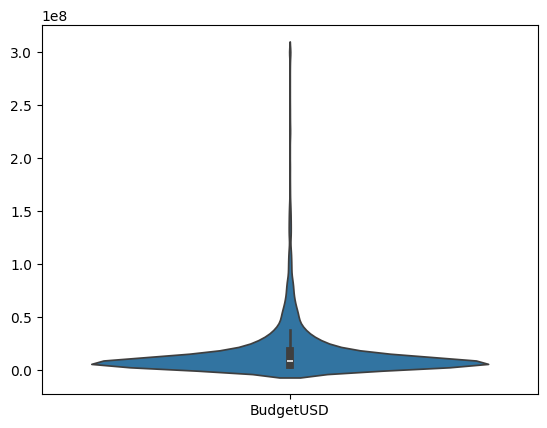

In [13]:
query = """
select 
    BudgetUSD
from df
where 
    BudgetUSD > 3265789.51
"""

result = ps.sqldf(query, locals())

sns.violinplot(data=result)
plt.show()

In [14]:
df['US_BoxOfficeUSD'].describe()

count       10000.00
mean     14880795.89
std      37415852.99
min         42267.88
25%       1483380.23
50%       4486118.64
75%      13281980.75
max     965487994.10
Name: US_BoxOfficeUSD, dtype: float64

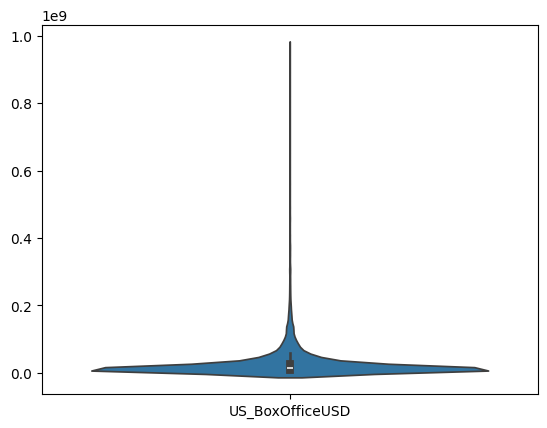

In [15]:
query = """
select 
    US_BoxOfficeUSD
from df
where 
    US_BoxOfficeUSD > 4388875.59
"""

result = ps.sqldf(query, locals())

sns.violinplot(data=result)
plt.show()

## Existe alguma relação entre bilheteria mundial e a nota de sites de pesquisa?

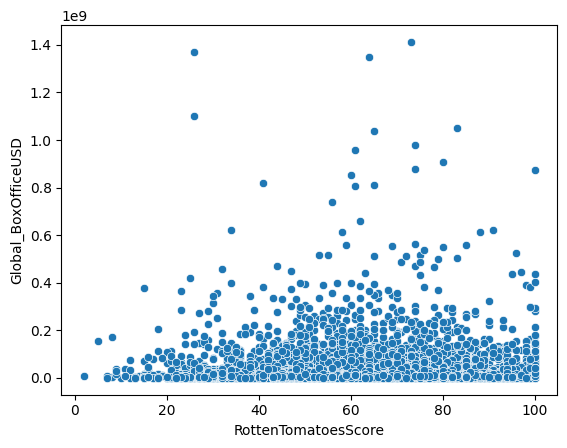

In [16]:
mundial = df[['Global_BoxOfficeUSD', 'IMDbRating', 'RottenTomatoesScore', 'US_BoxOfficeUSD']]
mundial = mundial.dropna()


# testado tambem com US_BoxOfficeUSD
sns.scatterplot(data=mundial, x='RottenTomatoesScore', y='Global_BoxOfficeUSD')
plt.show()



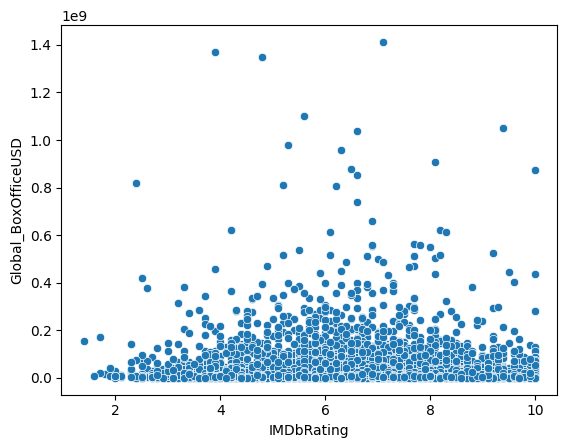

In [17]:
sns.scatterplot(data=mundial, x='IMDbRating', y='Global_BoxOfficeUSD')
plt.show()